# TFM. Modelo
## MVP

## Importacion de librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

## Modelo

In [2]:
df_data = pd.read_pickle('./data/df_data')

In [3]:
df_data.head()

,index,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce,E-commerce canje,Ecobox 25,Económico,Express documentos,Express paquetes,Marítimo baleares,Mascotas,Mrw economy (ecopaq),OperativaServicioEnumECOBA,Plan ayuda,Retorno albarán,Retorno burofax,Retorno canje,Urgente 10,Urgente 10 expedición,Urgente 12,Urgente 12 expedición,Urgente 14,Urgente 14 expedición,Urgente 19,Urgente 19 expedición,Urgente 8:30,Urgente 8:30 expedición,Urgente funchal,Urgente hoy,Envios,dateCreacion
0,2020-01-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.098612,0.000000,3.044522,0.000000,0.0,0.0,1.791759,0.000000,0.000000,0.0,0.0,0.0,0.0,279.0
2,2020-01-07,0.0,0.0,0.000000,0.0,0.0,0.0,5.981414,0.0,0.0,4.955827,0.0,0.0,5.225747,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.693147,0.000000,1.386294,0.000000,0.0,0.0,1.386294,0.000000,0.000000,0.0,0.0,0.0,0.0,194.0
3,2020-01-08,0.0,0.0,1.791759,0.0,0.0,0.0,3.135494,0.0,0.0,1.386294,0.0,0.0,6.388561,3.135494,0.0,0.0,0.0,0.000000,0.0,0.0,4.844187,1.791759,5.147494,2.484907,0.0,0.0,4.605170,3.496508,0.000000,0.0,0.0,0.0,0.0,172.0
4,2020-01-09,0.0,0.0,2.079442,0.0,0.0,0.0,7.230563,0.0,0.0,5.945421,0.0,0.0,4.574711,2.639057,0.0,0.0,0.0,0.000000,0.0,0.0,4.859812,1.791759,5.170484,2.639057,0.0,0.0,4.969813,4.094345,0.693147,0.0,0.0,0.0,0.0,186.0
5,2020-01-10,0.0,0.0,0.000000,0.0,0.0,0.0,6.661855,0.0,0.0,5.897154,0.0,0.0,7.726213,0.000000,0.0,0.0,0.0,1.791759,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,221.0


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [5]:
reg = LinearRegression()

In [6]:
#X = df_explore.loc[:,['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]
X = df_data.iloc[:,7:-1]
y = df_data['dateCreacion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
reg.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = reg.predict(X_test)

In [9]:
mean_absolute_error(y_test, y_pred)

52.04625503637613

In [10]:
analisisX = df_data.iloc[:,-1].reset_index()
analisisX = analisisX['dateCreacion']

analisisPre = reg.predict(X)
analisisPre = pd.DataFrame(analisisPre)
#analisisX, analisisPre

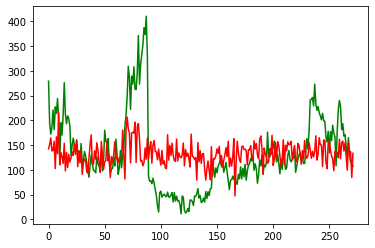

In [11]:
plt.plot(analisisX, c='green')
plt.plot(analisisPre, c='red')

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [13]:
reg_gs = GridSearchCV(KNeighborsRegressor(),
                        param_grid={"n_neighbors":np.arange(3,50)})

In [14]:
reg_gs.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [15]:
reg_gs.best_params_, reg_gs.best_score_

({'n_neighbors': 48}, -2.3485654165031535)

In [16]:
regk = KNeighborsRegressor(n_neighbors=3)

In [17]:
regk.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [18]:
y_predk = regk.predict(X_test)

In [19]:
#MAE
mean_absolute_error(y_test, y_predk)

65.69696969696969

In [20]:
cross_val_score(regk,X,y,scoring='neg_mean_absolute_error').mean()

-68.67189674523009

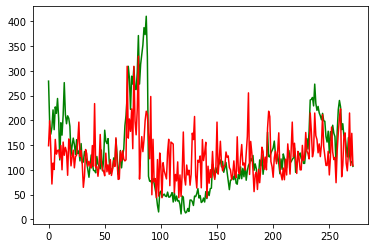

In [21]:
analisisPre = regk.predict(X)
analisisPre = pd.DataFrame(analisisPre)
analisisPre

plt.plot(analisisX, c='green')
plt.plot(analisisPre, c='red')